# 📘 Regression Model Exercise – Module 6

This notebook is an in-class exercise to explore linear regression using Python, focusing on model building, evaluation, and diagnostics.

---

## 🔍 Part A: Association Exploration

In [2]:
# Import housing data and explore Association between variables
# Try analytics and graphical tools
import pandas as pd
df = pd.read_csv('housing.csv')
df.drop(columns=['Unnamed: 0'], inplace = True)
df

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2
...,...,...,...,...,...
501,9.67,11.93,0.573,6.593,22.4
502,9.08,11.93,0.573,6.120,20.6
503,5.64,11.93,0.573,6.976,23.9
504,6.48,11.93,0.573,6.794,22.0


**Q1: Which variables seem most linearly associated with `MEDV`?**

**Q2: What does this imply for your model?**

In [3]:
df.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


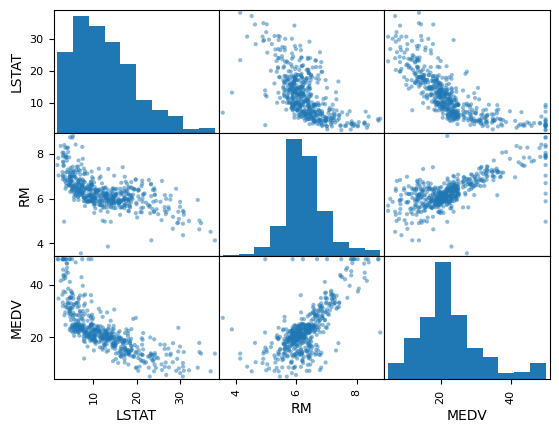

In [6]:
# Create scatter plots of MEDV with other columns

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df[['LSTAT','RM', 'MEDV']])
plt.show()

---
## 🛠️ Part B: Simple Linear Regression with RM

Mean Absolute Error: 4.478335832064149
Mean Squared Error: 46.144775347317264
R-squared: 0.3707569232254778


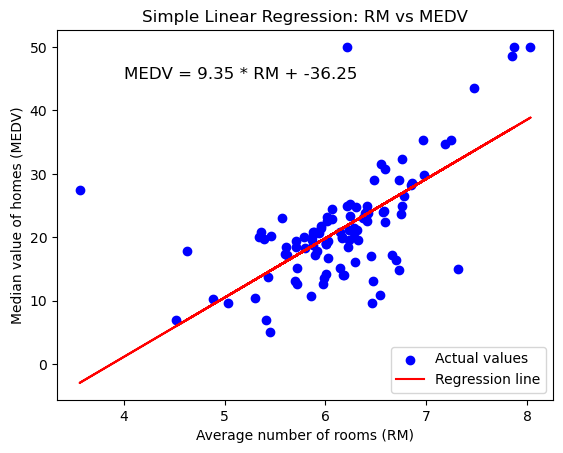

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Extract relevant columns (RM and MEDV)
X = df[['RM']]  # Predictor (Rooms)
y = df['MEDV']  # Target (Median Value of Homes)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Get the slope (coefficient) and intercept from the model
slope = model.coef_[0]
intercept = model.intercept_

# Create the regression equation as a string
equation = f"MEDV = {slope:.2f} * RM + {intercept:.2f}"

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Regression line')

# Add the equation to the plot
plt.text(4, 45, equation, fontsize=12, color='black')

# Labels and title
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Median value of homes (MEDV)')
plt.title('Simple Linear Regression: RM vs MEDV')
plt.legend()
plt.show()


In [12]:
# now the same using statsmodel
import statsmodels.formula.api as smf
model = smf.ols(formula = 'MEDV~RM', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.49e-74
Time:                        15:30:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

**Q1: What do the slope and intercept tell us?**

**Q2: How strong is the model fit based on R-squared and p-values?**

In [ ]:

#Strength of the relationship: The R-squared value of 0.484 suggests that the model has a moderate fit, 
# meaning that while it captures a substantial amount of the variation in MEDV, a large portion of the 
# variation remains unexplained.

# Statistical significance: Both the F-statistic and p-values indicate that the model and the 
# predictor RM are statistically significant. The relationship between RM and MEDV is unlikely 
# to be due to random chance.

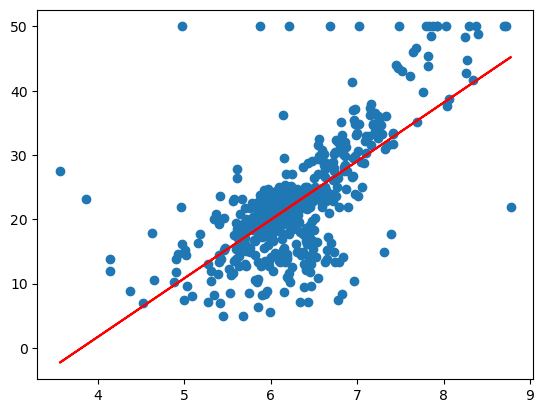

In [16]:
df['predicted'] = model.predict(df['RM'])
plt.scatter(df['RM'],df['MEDV'])
plt.plot(df['RM'],df['predicted'],color = 'red')
plt.show()

Darwin-Watson idealy is equal to 2.
This means that meet independance assumption.
If is is  <2, there is a positive autocorrelation 
if >2 there is a negative autocorrelation

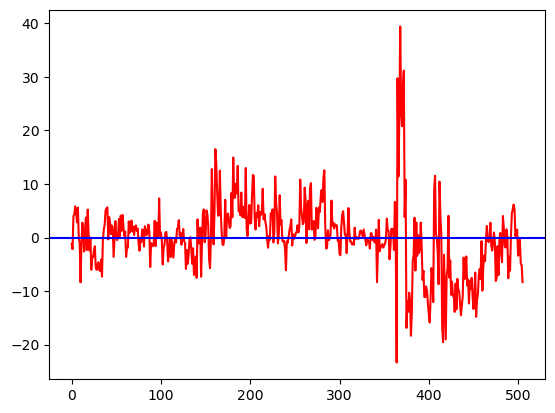

---
## ✅ Part C: Assumption Diagnostics

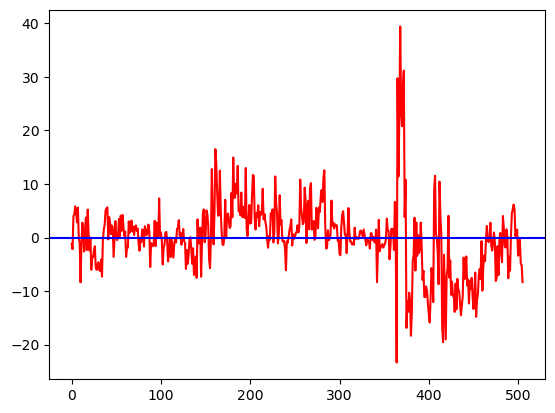

In [19]:
# Independence Assumption Check
df['residuals']= df['MEDV']-df['predicted']
plt.plot(df['residuals'],color = 'red')
plt.axhline(y=0, color = 'blue')
plt.show()

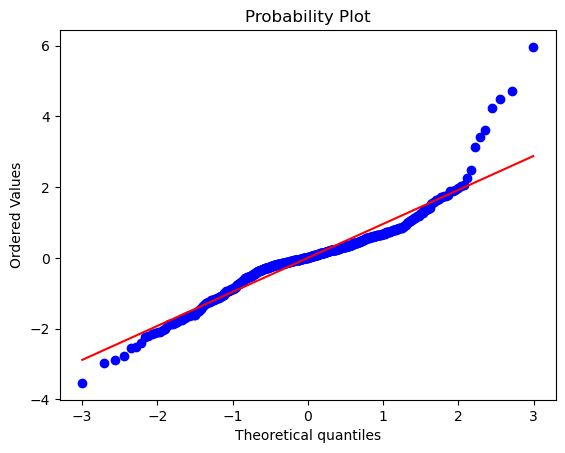

In [29]:
# Normality Assumption Check
z = (df['residuals']-df['residuals'].mean())/df['residuals'].std()
import scipy.stats as stats
stats.probplot(z, dist='norm', plot=plt)
plt.show()

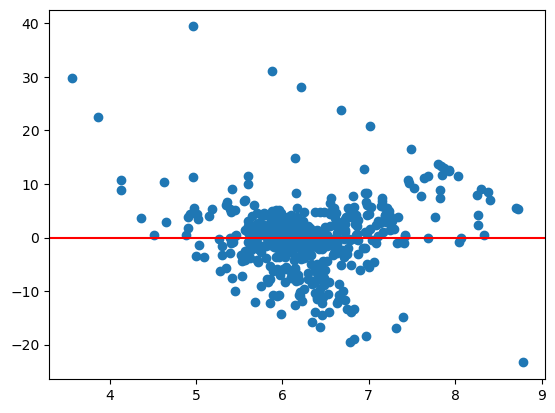

In [23]:
# Homoscedasticity Assumption Check (Constant Variance of Errors)
plt.scatter(df['RM'],df['residuals'])
plt.axhline(y=0, color = 'red')
plt.show()

**Q1: Do the assumptions seem valid?**


**Q2: If not, which assumptions are violated and how might you address them?**

---
## ✅ Part D: Multiple Linear Regression

In [31]:
formula = 'MEDV~RM+LSTAT' #-NOX & INDUS
regressor = smf.ols(formula = formula, data = df).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          7.01e-112
Time:                        15:49:25   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6